<a href="https://colab.research.google.com/github/Mark-maker/Telco-Churn-Prediction/blob/master/Telco_Churn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This dataset is taken from** Kaggle** - **Telco Customer Churn** is a **classification Problem**.

**Customer Churn**, in simple words can be defined as losing an existing customer to a competitor. It's widely calcuted in terms of percentages of total customers of previous quarter's.
Customer Churn is a very common problem across multiple industries such as **Telecom, Banking, Retail, Fashion** etc.   



---




The **Telco Dataset** has various features such as **bold text**Gender, MonthlyCharges, InternetService, PaymentMethod etc along with out Target Variable **Churn** (**Yes** (Churned) or **No** (Not Churned)). Our end goal is to predict whoever Customers are going to churn.. 

Let's get started...


In [0]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.svm import SVC

In [0]:
df=pd.read_csv('E:\\telco-customer-churn\\Telco-Customer-Churn.csv')

In [0]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [0]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [0]:
df.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

<h3>Looks like the dataset has no na values.. <h3>

In [0]:
df[df.Churn=='Yes'].shape[0]/df[df.Churn=='No'].shape[0] #Not too severely imbalanced

0.36122922303826827

In [0]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [0]:
#TotalCharges is not present above, Let's see dtype of TotalCharges column
np.dtype(df.TotalCharges)

dtype('O')

In [0]:
#Let's convert it to a numeric type
df.TotalCharges=pd.to_numeric(df.TotalCharges)

ValueError: Unable to parse string " " at position 488

In [0]:
#By looking at the above error, we can understand the reason behind the dtype('o')

len(df[df.TotalCharges==' ']) #We have 11 records with Total Charges value -> ' ' and all these rows have Churn value 'NO', let's remove these rows from our analysis (Having information on Churned customers is more important than info on unchurned records)  
df=df[df.TotalCharges!=' ']

df.TotalCharges=pd.to_numeric(df.TotalCharges)
np.dtype(df.TotalCharges)


dtype('float64')

In [0]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7032.000000,7032.000000,7032.000000,7032.000000
mean,0.162400,32.421786,64.798208,2283.300441
std,0.368844,24.545260,30.085974,2266.771362
min,0.000000,1.000000,18.250000,18.800000
25%,0.000000,9.000000,35.587500,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.862500,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


In [0]:
#Ideally SeniorCitizen column should be a factor, so let's convert 1,0 values to Yes,No and later we can label encode all factor columns

df.SeniorCitizen=df.SeniorCitizen.apply(lambda x: 'Yes' if x==1 else 'No')
df.SeniorCitizen.value_counts()

No     5890
Yes    1142
Name: SeniorCitizen, dtype: int64

In [0]:
# df.MultipleLines.value_counts()
# df.DeviceProtection.value_counts()
# df.OnlineBackup.value_counts()
# df.OnlineSecurity.value_counts()
# df.StreamingMovies.value_counts()
# df.StreamingTV.value_counts()
# df.TechSupport.value_counts()


No     4607
Yes    2425
Name: OnlineBackup, dtype: int64

In [0]:
cat_cols_for_wrangling=['MultipleLines','DeviceProtection','OnlineBackup','OnlineSecurity','StreamingMovies','StreamingTV','TechSupport','InternetService']

In [0]:
#Some Data Wrangling.. We will Convert values like 'No Phone Service', 'No Internet Service' to 'No'. In other words, we're creating binary columns (Yes or No)

for col in cat_cols_for_wrangling:
    df[col]=df[col].apply(lambda x: 'No' if 'No' in x else 'Yes')

In [0]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [0]:
cols=df.columns
cols=cols.drop(['customerID','MonthlyCharges','TotalCharges'])
all_cat_cols=list(cols) #All the categorical features that are required for analysis, we'll remove customerID since it's just an ID column with no significance for the analysis

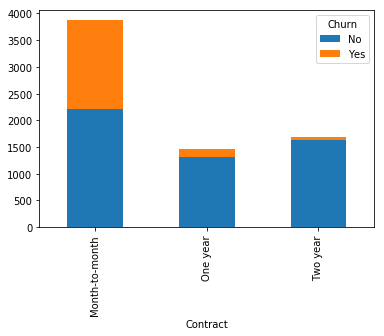

In [0]:
df.groupby(['Contract','Churn']).size().unstack().plot(kind='bar',stacked=True); #Clearly, users with Month-to-Month contract are more likely to churn 

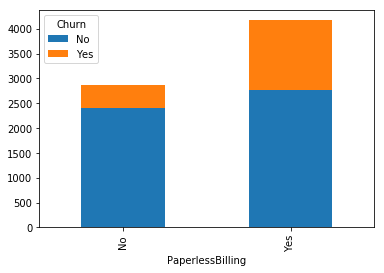

In [0]:
df.groupby(['PaperlessBilling','Churn']).size().unstack().plot(kind='bar',stacked=True);

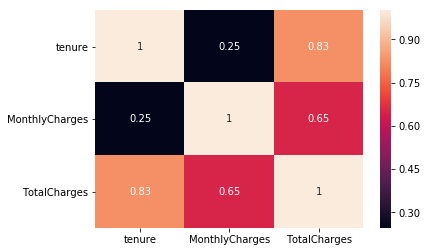

In [0]:
#Now, let's look at the numerical data. Creating correlation heatmap

sns.heatmap(df.corr(),annot=True);

#Tenure and TotalCharges, Monthly and TotalCharges are corelated and it makes sense,as totalcharges = tenure*MonthlyCharges

In [0]:
#It makes more sense to categorize customers wrt tenure, so let's convert tenure column to tenure range/buckets

def convert_to_buckets(tenure):
    
    if tenure <=24:
        return '0 - 24 months'
    elif tenure <=36:
        return '24 - 36 months'
    elif tenure <=48:
        return '36 - 48 months'
    elif tenure <=60:
        return '48 - 60 months'
    else:
        return '> 60 months'

In [0]:
df['tenure']=df['tenure'].map(convert_to_buckets)
df['tenure'].value_counts()

0 - 24 months     3199
> 60 months       1407
48 - 60 months     832
24 - 36 months     832
36 - 48 months     762
Name: tenure, dtype: int64

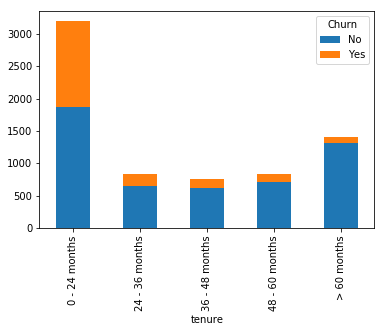

In [0]:
df.groupby(['tenure','Churn']).size().unstack().plot(kind='bar',stacked=True); #customers with 0-24 months tenure are more likely to churn.. 
#From the plot, it is evident that 'tenure' is an important feature as well./

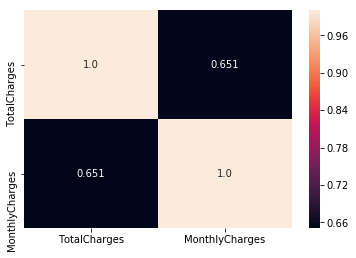

In [0]:
sns.heatmap(df[['TotalCharges','MonthlyCharges']].corr(),annot=True,fmt='.3');
#Since, monthly and Total Charges are corelated.. We'd need to remove one of them, let's remove TotalCharges..

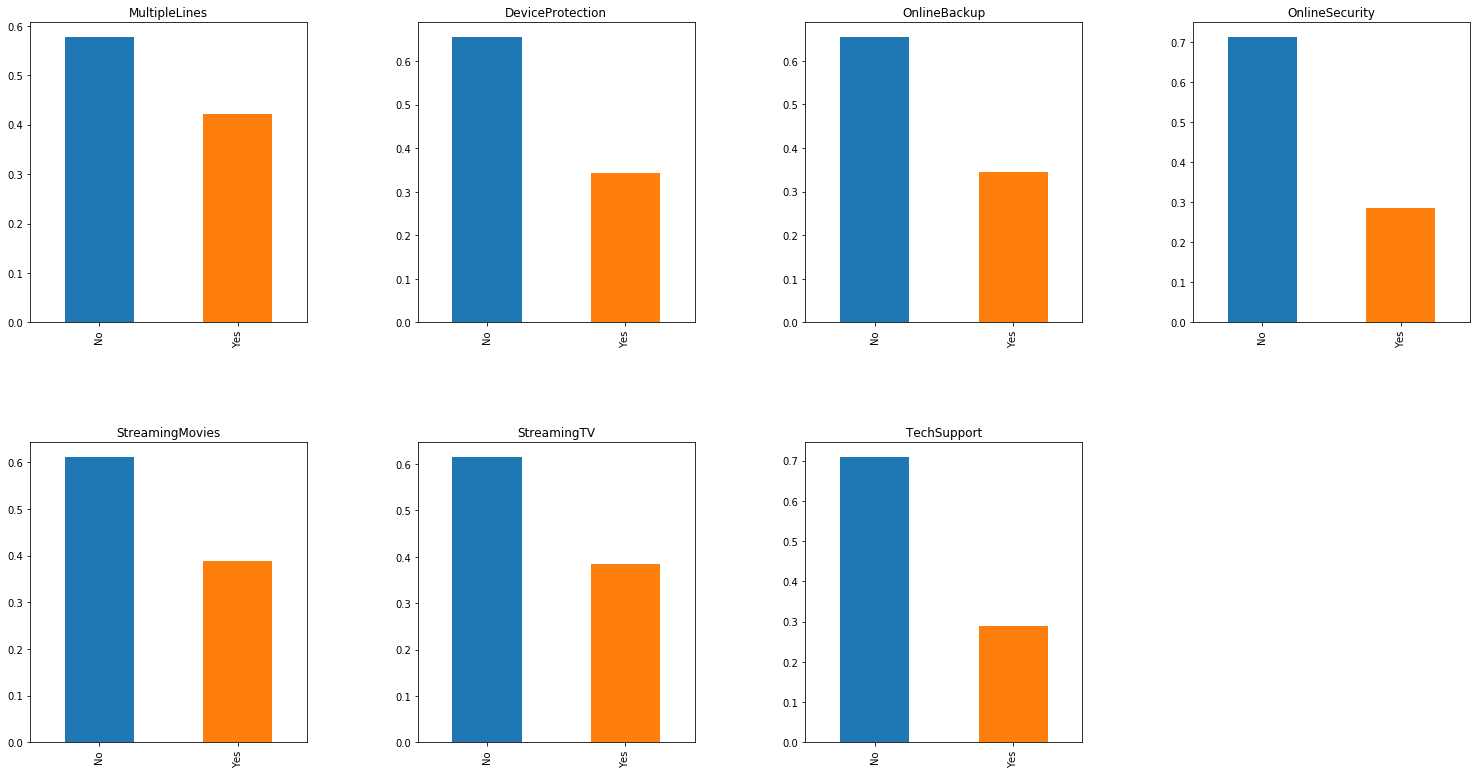

In [0]:
f=plt.figure(figsize=(10,10));
for i in range(7):
    f.add_subplot(2,4,i+1)
    df[cat_cols[i]].value_counts(normalize=True).plot(kind='bar',title=cat_cols[i])
plt.subplots_adjust(left=3,right=5,top=3,bottom=2,wspace = 0.4,hspace = 0.4)

In [0]:
all_cat_cols #All Categorical column names

['gender',
 'SeniorCitizen',
 'Partner',
 'Dependents',
 'tenure',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'Churn']

In [0]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()

for col in all_cat_cols:
    df[col] = labelencoder.fit_transform(df[col])
    

df[all_cat_cols].head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn
0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,1,2,0
1,1,0,0,0,1,1,0,1,1,0,1,0,0,0,1,0,3,0
2,1,0,0,0,0,1,0,1,1,1,0,0,0,0,0,1,3,1
3,1,0,0,0,2,0,0,1,1,0,1,1,0,0,1,0,0,0
4,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,2,1


<h3>Train - Test Data split<h3>

In [0]:
#from sklearn.model_selection import train_test_split

X_train=df.sample(frac=0.8,random_state=199)
X_test=df.drop(X_train.index)
len(X_train),len(X_test)

(5626, 1406)

In [0]:
Y_train=X_train['Churn']
Y_test=X_test['Churn']

In [0]:
#Monthly and TotalCharges are corelated, so we remove one of them, we're removing total charges

X_train.drop(columns=['Churn','customerID','TotalCharges'],axis=1,inplace=True)
X_test.drop(columns=['Churn','customerID','TotalCharges'],axis=1,inplace=True)

X_train.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges'],
      dtype='object')

Now, We're ready to go for model building, but before we do it.. Let's understand the metrics that matter for this specific problem.


*  Our ultimate goal is to retain as many churning customers as we can. We don't care much if we predict a customer to be churning turns out not churning ie., our Model should have more True positives and less False Negatives. It doesn't matter if we have many False Positives because we care more about no. of false Negatives. The less the no. of False Negatives, the more we're sure about retention.. 


Just to be clear: In our scenario/perspective:

* A False Positive is when we predict a customer to be churning turns out to be not Churning.
* A False Negative is when we predict a customer to be not churning turns out  Churnign.

It doesn't cost us much if we give an exciting offer (expensive for comapany) to a loyal customer who's not about to leave us. But it costs us a lot if we don't interact/give an offer to a customer who's about to leave us soon. (Because It's a standard rule that acquiring a customer costs more than retaining one.)



---

So, the metric we're looking for is  --> **RECALL**

Recall=TP/TP+FN

Recall gives us the measure of - What proportion of Churned Customers have we retained/Predicted. The less False Negatives we get, The more recall we have... Let's go ahead and build the model



<h2>Model Building<h2>
<h3>Logistic Regression<h3>

In [0]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

log_model=LogisticRegression(class_weight='balanced')#https://stackoverflow.com/questions/30972029/how-does-the-class-weight-parameter-in-scikit-learn-work
log_model.fit(X_train,Y_train)

Y_pred=log_model.predict(X_test)

In [0]:
accuracy_score(Y_pred,Y_test)

0.7290184921763869

In [0]:
print(classification_report(Y_pred,Y_test))

             precision    recall  f1-score   support

          0       0.71      0.90      0.79       803
          1       0.79      0.50      0.61       603

avg / total       0.74      0.73      0.72      1406



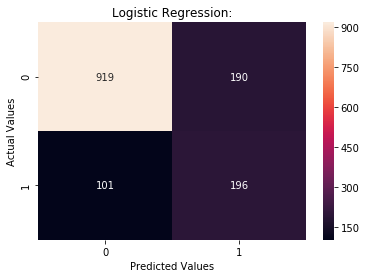

In [0]:
sns.heatmap(confusion_matrix(Y_pred,Y_test),annot=True,fmt='1')
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.title('Logistic Regression:'); #';' to exclude printing 'plt' object details 

In [0]:
Y_Pred1={}

for i in range(1,6):
    
    Y_pred1['0.'+str(15*i)]=pd.Series(Y_probs).apply(lambda x: 1 if x>0.15*i else 0)
    print('Threshold at ','0.'+str(15*i),':\n',classification_report(Y_pred1['0.'+str(15*i)],Y_test),'\n')


Threshold at  0.15 :
              precision    recall  f1-score   support

          0       0.56      0.93      0.70       613
          1       0.89      0.43      0.58       793

avg / total       0.74      0.65      0.63      1406
 

Threshold at  0.30 :
              precision    recall  f1-score   support

          0       0.74      0.89      0.81       852
          1       0.76      0.53      0.62       554

avg / total       0.75      0.75      0.74      1406
 

Threshold at  0.45 :
              precision    recall  f1-score   support

          0       0.87      0.84      0.86      1059
          1       0.56      0.62      0.59       347

avg / total       0.79      0.79      0.79      1406
 

Threshold at  0.60 :
              precision    recall  f1-score   support

          0       0.95      0.79      0.86      1220
          1       0.35      0.72      0.47       186

avg / total       0.87      0.78      0.81      1406
 

Threshold at  0.75 :
              precision

<h2>Random Forest Classifier<h2>

In [0]:
from sklearn.ensemble import RandomForestClassifier

rf_model=RandomForestClassifier()

In [0]:
rf_model.fit(X_train,Y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [0]:
Y_rf_Pred=rf_model.predict(X_test)

In [0]:
#list(zip(list(rf_model.predict_proba(X_test)[:,0]),Y_pred.tolist()))

In [0]:
print(classification_report(Y_rf_Pred,Y_test))

             precision    recall  f1-score   support

          0       0.90      0.80      0.84      1149
          1       0.40      0.60      0.48       257

avg / total       0.81      0.76      0.78      1406



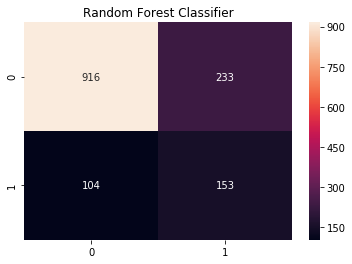

In [0]:
sns.heatmap(confusion_matrix(Y_rf_Pred,Y_test),annot=True,fmt='1')
plt.title('Random Forest Classifier');

In [0]:
probs=rf_model.predict_proba(X_test)
Y_rf_probs=[prob[1] for prob in probs]

In [0]:
#https://stackoverflow.com/questions/49785904/how-to-set-threshold-to-scikit-learn-random-forest-model
Y_Pred1={}

for i in range(1,7):
    
    Y_pred1['0.'+str(15*i)]=(probs[:,1]>0.15*i).astype('int')
    print('Threshold at ','0.'+str(15*i),':\n',classification_report(Y_pred1['0.'+str(15*i)],Y_test),'\n')

len(Y_pred1)


Threshold at  0.15 :
              precision    recall  f1-score   support

          0       0.57      0.90      0.70       650
          1       0.83      0.42      0.56       756

avg / total       0.71      0.64      0.63      1406
 

Threshold at  0.30 :
              precision    recall  f1-score   support

          0       0.79      0.83      0.81       975
          1       0.57      0.51      0.54       431

avg / total       0.73      0.73      0.73      1406
 

Threshold at  0.45 :
              precision    recall  f1-score   support

          0       0.85      0.81      0.83      1071
          1       0.48      0.56      0.52       335

avg / total       0.77      0.75      0.76      1406
 

Threshold at  0.60 :
              precision    recall  f1-score   support

          0       0.93      0.78      0.85      1214
          1       0.32      0.65      0.43       192

avg / total       0.85      0.77      0.79      1406
 

Threshold at  0.75 :
              precision

1412

In [0]:
from sklearn.ensemble import GradientBoostingClassifier

gb_clf=GradientBoostingClassifier()
gb_clf.fit(X_train,Y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              presort='auto', random_state=None, subsample=1.0, verbose=0,
              warm_start=False)

In [0]:
Y_pred=gb_clf.predict(X_test)

In [0]:
print(classification_report(Y_pred,Y_test))

             precision    recall  f1-score   support

          0       0.91      0.83      0.87      1122
          1       0.50      0.68      0.57       284

avg / total       0.83      0.80      0.81      1406



GB Classifier has a very good recall relatively.. 

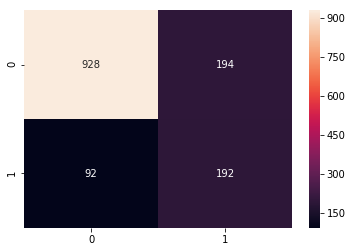

In [0]:
sns.heatmap(confusion_matrix(Y_pred,Y_test),annot=True,fmt='1')

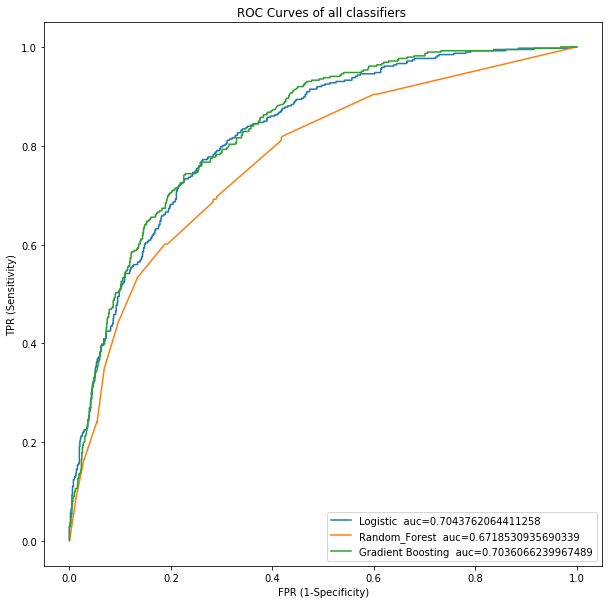

In [0]:
plt.figure(figsize=(10,10));
plt.title('ROC Curves of all classifiers ')
plt.xlabel('FPR (1-Specificity)')
plt.ylabel('TPR (Sensitivity)')
def model(clf,X_train,X_test,Y_train):
    
    clf.fit(X_train,Y_train)
    Y_pred,Y_probs=clf.predict(X_test),clf.predict_proba(X_test)[:,1]
    return  Y_pred,Y_probs

clfs={'Logistic':LogisticRegression(),'Random_Forest':RandomForestClassifier(),'Gradient Boosting':GradientBoostingClassifier()}
    
for clf_name in clfs.keys():
    
    model =clfs[clf_name]  # select the model
    model.fit(X_train, Y_train)  # train the model
    Y_pred = model.predict(X_test)  # predict the test data
    fpr, tpr, thresholds = roc_curve(Y_test, model.predict_proba(X_test)[:, 1])
    # Calculate Area under the curve to display on the plot
    auc = roc_auc_score(Y_test, model.predict(X_test))
    plt.plot(fpr,tpr,label=clf_name+"  auc="+str(auc));
    plt.legend(loc=4)



Looking at the above AUC curve, we should pick either Logistic or Gradient Boosting Classifier.. Since GB Classifier has a fair recall. I'll go with GB Classifier

Also, Note that the target variable is imbalaced and we've not yet trained the model with under/over sampling data.. 

Let's now use undersampling method for training the models..

I'll update the code soon..